# Metodología de la etapa de preprocesamiento  



In [1]:
import pandas as pd

In [5]:
df = pd.read_excel(r"C:\Users\usuario1\OneDrive - Universidad de Antioquia\UNIVERSIDAD DE ANTIOQUIA\Proyecto SAT Dengue\Bases de datos\Datos meteorológicos\NASA POWER\Datos_NS_2021-2025.xlsx")
df

,YEAR,DOY,T2M,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,WS2M,WS2M_MAX,WS2M_MIN,UV
0,2021,1,28.38,34.96,23.58,16.62,71.66,3.59,0.14,0.24,0.02,2.48
1,2021,2,27.44,33.39,23.64,17.98,80.54,12.12,0.10,0.23,0.04,2.18
2,2021,3,28.64,35.09,23.84,17.89,75.41,4.03,0.14,0.32,0.07,2.48
3,2021,4,28.48,35.05,23.69,15.91,68.69,0.70,0.14,0.25,0.07,2.47
4,2021,5,27.84,34.96,22.71,15.16,68.47,0.62,0.16,0.34,0.03,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2025,361,25.57,29.97,22.11,17.52,85.76,0.32,0.22,0.52,0.02,-999.00
1822,2025,362,26.04,30.44,22.57,18.30,87.05,0.26,0.18,0.40,0.02,-999.00
1823,2025,363,26.71,30.86,23.23,18.73,85.70,0.38,0.15,0.54,0.01,-999.00
1824,2025,364,26.10,29.16,24.11,19.13,90.13,0.64,0.11,0.15,0.04,-999.00


In [8]:
df.min()

YEAR           2021.00
DOY               1.00
T2M              23.97
T2M_MAX          25.52
T2M_MIN          20.80
QV2M             13.90
RH2M             50.64
PRECTOTCORR       0.00
WS2M              0.07
WS2M_MAX          0.12
WS2M_MIN          0.00
UV             -999.00
dtype: float64

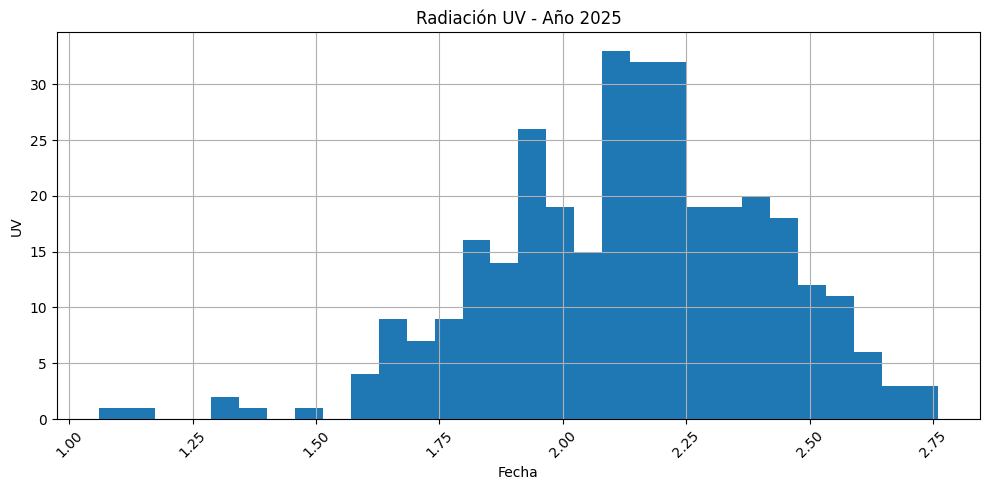

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar que YEAR y DOY sean numéricos
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['DOY'] = pd.to_numeric(df['DOY'], errors='coerce')

# Crear fecha
df['fecha'] = (
    pd.to_datetime(df['YEAR'].astype(int).astype(str), format='%Y')
    + pd.to_timedelta(df['DOY'].astype(int) - 1, unit='D')
)

# Filtrar hasta noviembre 2025
df_2025 = df[(df['YEAR'] == 2025) & (df['fecha'] <= pd.Timestamp('2025-11-29'))]

# Graficar
plt.figure(figsize=(10,5))
plt.hist(df_2025['UV'], bins=30)
plt.xlabel('Fecha')
plt.ylabel('UV')
plt.title('Radiación UV - Año 2025')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


## OJO: Investigar

porqué toman los valores uv de 0 a 1 y como el atributo uv tiene relacion con la actividad del mosquito